In [ ]:
# Import to be able to import python package from src
import sys

sys.path.insert(0, '../src')

---
## Creation of the model

Import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import ontime as on

Generate some fake data

df.index: DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-01-31 14:00:00', '2023-01-31 15:00:00',
               '2023-01-31 16:00:00', '2023-01-31 17:00:00',
               '2023-01-31 18:00:00', '2023-01-31 19:00:00',
               '2023-01-31 20:00:00', '2023-01-31 21:00:00',
               '2023-01-31 22:00:00', '2023-01-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=744, freq='H')
df.index: DatetimeIndex(['2023-02-01 00:00:00', '2023-02-01 01:00:00',
               '2023-02-01 02:00:00', '2023-02-01 03:00:00',
               '2023-02-01 04:00:00', '2023-02-01 05:00:00',
               '2023-02-01 06:00:00', '2023-02-01 07:00:00',
               '2023-02-01 08:00:

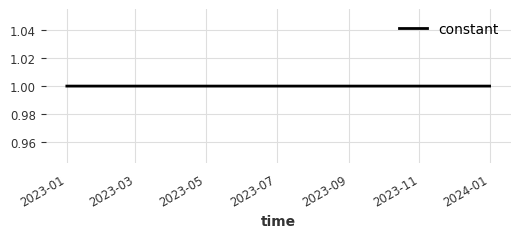

In [11]:
ts = on.generators.constant().generate(freq='H' , start=pd.Timestamp('01-01-2023 00:00:00'), end=pd.Timestamp('12-31-2023 12:00:00'))
fig, ax = plt.subplots(figsize=(6, 2))
ts.plot(ax=ax)

# TODO : Change this import _ProfileMaker is abstract. It should not be instantiated
# It has only static methods
_ProfileMaker = on.context.common._ProfileMaker()

weekly_sum = _ProfileMaker.make_profile(ts, _ProfileMaker.Period.MONTHLY, _ProfileMaker.Aggregation.SUM)


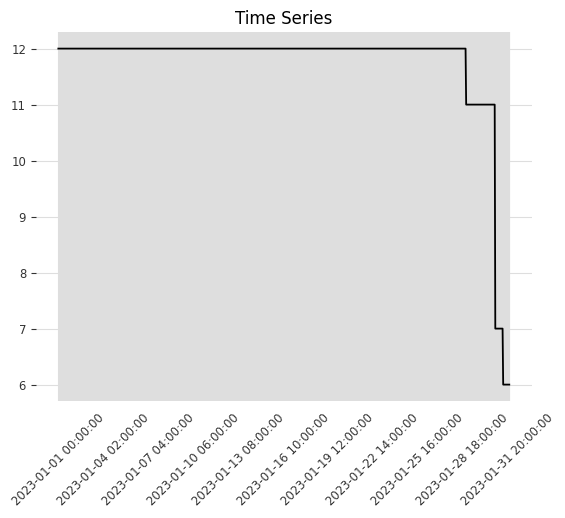

In [12]:
# Convert the TimeSeries to a DataFrame
ts_df = weekly_sum.pd_dataframe()
ts_df = ts_df.reset_index()  # Reset the index to access the time column

# Create the plot
plt.plot(ts_df[_ProfileMaker.TIME_COL], ts_df[_ProfileMaker.VALUE_COL])
plt.title('Time Series')

# Calculate the number of data points
num_data_points = len(ts_df)

# Calculate the step size to select every 10th data point
step = max(1, num_data_points // 10)  # Ensure step is at least 1

# Create a list of x-values to use as tick positions
x_ticks = ts_df[_ProfileMaker.TIME_COL].tolist()  # Convert the 'time' column to a list

# Set every 10th tick label to be empty, keeping others as empty strings
for i in range(num_data_points):
    if i % step != 0:
        x_ticks[i] = ''

# Set the x-axis tick positions and labels
plt.xticks(ts_df[_ProfileMaker.TIME_COL], x_ticks, rotation=45)  # You can adjust the rotation as needed


# Show the plot
plt.show()


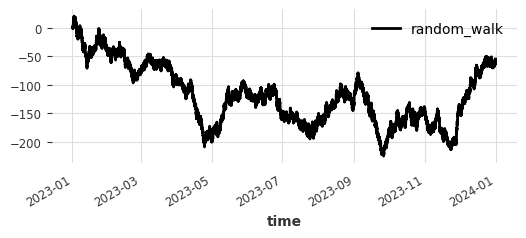

In [13]:
ts = on.generators.random_walk().generate(freq='15T' , start=pd.Timestamp('01-01-2023 12:00:00'), end=pd.Timestamp('12-31-2023 12:00:00'))
fig, ax = plt.subplots(figsize=(6, 2))
ts.plot(ax=ax);

df.index: DatetimeIndex(['2023-01-01 12:00:00', '2023-01-01 12:15:00',
               '2023-01-01 12:30:00', '2023-01-01 12:45:00',
               '2023-01-01 13:00:00', '2023-01-01 13:15:00',
               '2023-01-01 13:30:00', '2023-01-01 13:45:00',
               '2023-01-01 14:00:00', '2023-01-01 14:15:00',
               ...
               '2023-01-31 21:30:00', '2023-01-31 21:45:00',
               '2023-01-31 22:00:00', '2023-01-31 22:15:00',
               '2023-01-31 22:30:00', '2023-01-31 22:45:00',
               '2023-01-31 23:00:00', '2023-01-31 23:15:00',
               '2023-01-31 23:30:00', '2023-01-31 23:45:00'],
              dtype='datetime64[ns]', name='time', length=2928, freq='15T')
df.index: DatetimeIndex(['2023-02-01 00:00:00', '2023-02-01 00:15:00',
               '2023-02-01 00:30:00', '2023-02-01 00:45:00',
               '2023-02-01 01:00:00', '2023-02-01 01:15:00',
               '2023-02-01 01:30:00', '2023-02-01 01:45:00',
               '2023-02-01 02:

([<matplotlib.axis.XTick at 0x266e72d0910>,
 [Text(19358.5, 0, '01 12:00'),
  Text(19361.59375, 0, '04 14:15'),
  Text(19364.6875, 0, '07 16:30'),
  Text(19367.78125, 0, '10 18:45'),
  Text(19370.875, 0, '13 21:00'),
  Text(19373.96875, 0, '16 23:15'),
  Text(19377.0625, 0, '20 01:30'),
  Text(19380.15625, 0, '23 03:45'),
  Text(19383.25, 0, '26 06:00'),
  Text(19386.34375, 0, '29 08:15'),
  Text(19389.4375, 0, '01 10:30')])

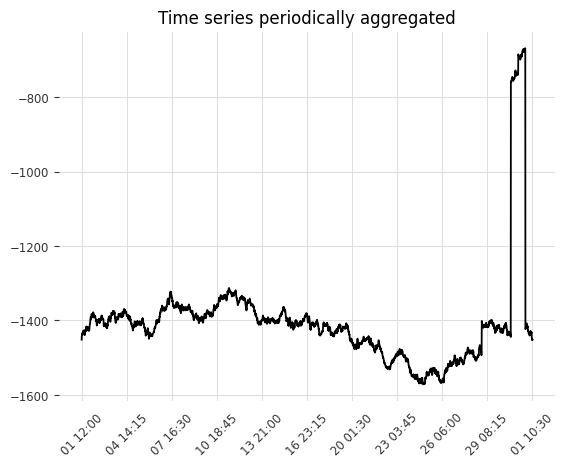

In [14]:
monthly_sum = _ProfileMaker.make_profile(ts, _ProfileMaker.Period.MONTHLY, _ProfileMaker.Aggregation.SUM)

monthly_sum_df = monthly_sum.pd_dataframe()
monthly_sum_df = monthly_sum_df.reset_index()  # Reset the index to access the time column

# Create the plot
plt.plot(monthly_sum_df[_ProfileMaker.TIME_COL], monthly_sum_df[_ProfileMaker.VALUE_COL])
plt.title('Time series periodically aggregated')

# Calculate the number of data points
num_data_points = len(monthly_sum_df)

# Calculate the step size to select every 10th data point
step = max(1, num_data_points // 10)  # Ensure step is at least 1

# Create a list of x-values to use as tick positions
x_ticks = monthly_sum_df[_ProfileMaker.TIME_COL][::step]
formatted_x_ticks = [value.strftime(_ProfileMaker.Period.MONTHLY.value[1]) for value in x_ticks]

# Set the x-axis tick positions and labels
plt.xticks(x_ticks, formatted_x_ticks, rotation=45)  # You can adjust the rotation as needed


df.index: DatetimeIndex(['2023-01-01 12:00:00', '2023-01-01 12:15:00',
               '2023-01-01 12:30:00', '2023-01-01 12:45:00',
               '2023-01-01 13:00:00', '2023-01-01 13:15:00',
               '2023-01-01 13:30:00', '2023-01-01 13:45:00',
               '2023-01-01 14:00:00', '2023-01-01 14:15:00',
               ...
               '2023-12-31 09:45:00', '2023-12-31 10:00:00',
               '2023-12-31 10:15:00', '2023-12-31 10:30:00',
               '2023-12-31 10:45:00', '2023-12-31 11:00:00',
               '2023-12-31 11:15:00', '2023-12-31 11:30:00',
               '2023-12-31 11:45:00', '2023-12-31 12:00:00'],
              dtype='datetime64[ns]', name='time', length=34945, freq='15T')


([<matplotlib.axis.XTick at 0x266e72fecd0>,
 [Text(19358.5, 0, 'Sunday 12:00'),
  Text(19394.895833333332, 0, 'Monday 21:30'),
  Text(19431.291666666668, 0, 'Wednesday 07:00'),
  Text(19467.6875, 0, 'Thursday 16:30'),
  Text(19504.083333333332, 0, 'Saturday 02:00'),
  Text(19540.479166666668, 0, 'Sunday 11:30'),
  Text(19576.875, 0, 'Monday 21:00'),
  Text(19613.270833333332, 0, 'Wednesday 06:30'),
  Text(19649.666666666668, 0, 'Thursday 16:00'),
  Text(19686.0625, 0, 'Saturday 01:30'),
  Text(19722.458333333332, 0, 'Sunday 11:00')])

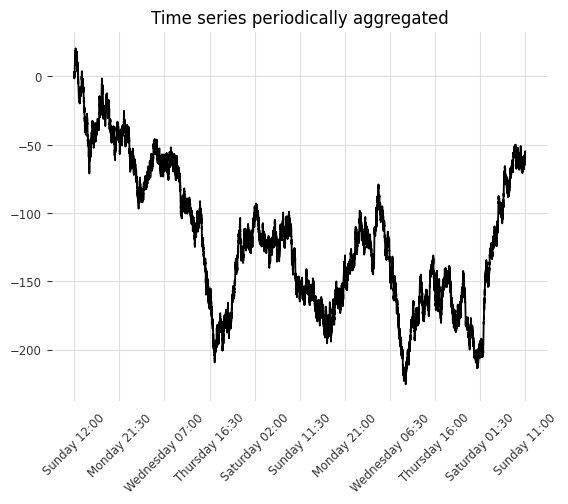

In [15]:
monthly_mean = _ProfileMaker.make_profile(ts, _ProfileMaker.Period.YEARLY, _ProfileMaker.Aggregation.MEAN)

monthly_mean_df = monthly_mean.pd_dataframe()
monthly_mean_df = monthly_mean_df.reset_index()  # Reset the index to access the time column


# Create the plot
plt.plot(monthly_mean_df[_ProfileMaker.TIME_COL], monthly_mean_df[_ProfileMaker.VALUE_COL])
plt.title('Time series periodically aggregated')

# Calculate the number of data points
num_data_points = len(monthly_mean_df)

# Calculate the step size to select every 10th data point
step = max(1, num_data_points // 10)  # Ensure step is at least 1

# Create a list of x-values to use as tick positions
x_ticks = monthly_mean_df[_ProfileMaker.TIME_COL][::step]
formatted_x_ticks = [value.strftime(_ProfileMaker.Period.WEEKLY.value[1]) for value in x_ticks]

# Set the x-axis tick positions and labels
plt.xticks(x_ticks, formatted_x_ticks, rotation=45)  # You can adjust the rotation as needed
